<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 139.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 164.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 82.4 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [5]:
## Write your code here
# df.columns
# df.dtypes
# df.describe()
# df.shape

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [3]:
## Write your code here
missing_values = df.isnull().sum()

# Tính tỷ lệ thiếu (%)
missing_percentage = (missing_values / len(df)) * 100

# Gộp lại thành bảng trực quan
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

# Hiển thị các cột có thiếu dữ liệu
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

                            Missing Count  Missing Percentage
AINextMuch less integrated          64289               98.25
AINextLess integrated               63082               96.40
AINextNo change                     52939               80.90
AINextMuch more integrated          51999               79.46
EmbeddedAdmired                     48704               74.43
...                                   ...                 ...
YearsCode                            5568                8.51
NEWSOSites                           5151                7.87
LearnCode                            4949                7.56
EdLevel                              4653                7.11
AISelect                             4530                6.92

[109 rows x 2 columns]


In [5]:
## Write your code here
# missing_value  = df['YearsCodePro'].isnull().sum()
# missing_value

# missing_percentage = (missing_value / len(df['YearsCodePro'])) * 100
# missing_percentage

# median_value = df['JobSat'].median()
# df['JobSat'].fillna(median_value, inplace=True)

# most_freq_value = df['YearsCodePro'].mode()[0]
# df['YearsCodePro'].fillna(most_freq_value, inplace=True)

/tmp/ipykernel_3289/3645289659.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(median_value, inplace=True)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
# ## Write your code here
# count_YearsCodePro = df['YearsCodePro'].value_counts()
# count_YearsCodePro

# count_Employment = df['Employment'].value_counts()
# count_Employment

# count_JobSat = df['JobSat'].value_counts()
# count_JobSat

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [ ]:
## Write your code here

plt.figure(figsize=(12, 6))
df['JobSat'].plot(kind='pie',
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('The distribution of JobSat', y=1.12, fontsize = 15) 

# add legend
plt.legend(labels=df['JobSat'], loc='upper left', fontsize=7) 

plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [5]:
## Write your code here
# Explode LanguageHaveWorkedWith
df['HaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df['WantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')

# Flatten lists
have_series = df.explode('HaveWorkedWith')['HaveWorkedWith'].str.strip()
want_series = df.explode('WantToWorkWith')['WantToWorkWith'].str.strip()

# Count frequencies
have_counts = have_series.value_counts()
want_counts = want_series.value_counts()


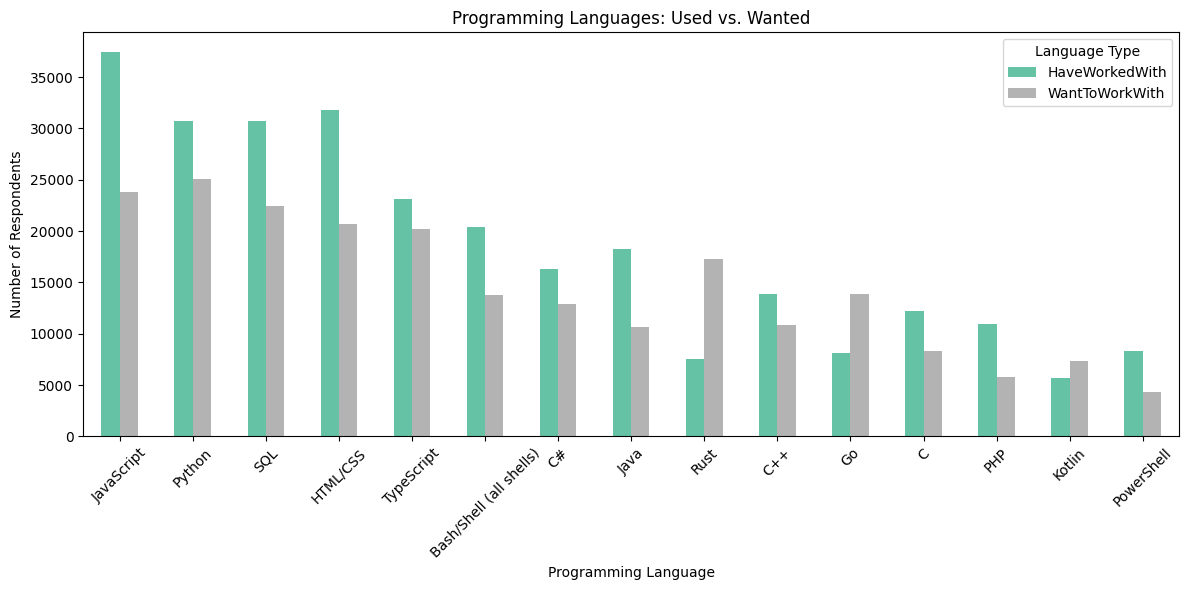

In [8]:
# Combine counts into one DataFrame
lang_compare = pd.DataFrame({
    'HaveWorkedWith': have_counts,
    'WantToWorkWith': want_counts
}).fillna(0).astype(int)

# Optional: Focus on top 15 languages by total popularity
lang_compare['Total'] = lang_compare['HaveWorkedWith'] + lang_compare['WantToWorkWith']
lang_compare = lang_compare.sort_values(by='Total', ascending=False).head(15)
lang_compare = lang_compare.drop(columns='Total')


lang_compare.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('Programming Languages: Used vs. Wanted')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Language')
plt.xticks(rotation=45)
plt.legend(title='Language Type')
plt.tight_layout()
plt.show()

In [7]:
# !pip install matplotlib_venn
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

have_set = set(have_series.unique())
want_set = set(want_series.unique())

plt.figure(figsize=(8, 6))
venn2([have_set, want_set], set_labels=('Have Worked With', 'Want To Work With'))
plt.title('Programming Language Overlap')
plt.show()

ModuleNotFoundError: No module named 'matplotlib_venn'

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


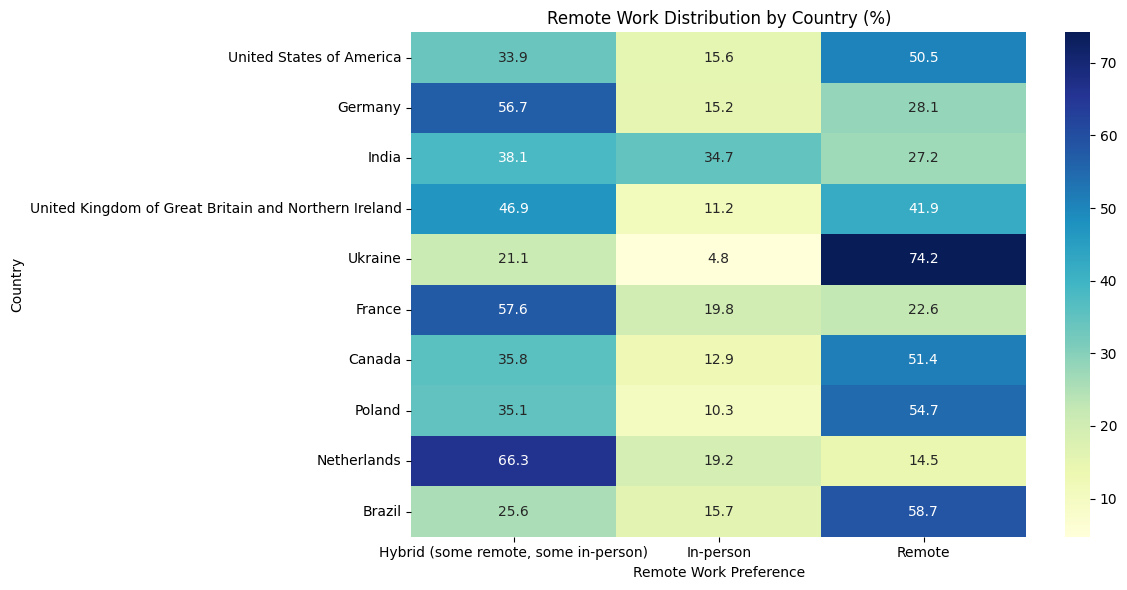

In [14]:
## Write your code here
remote_grouped = df.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')
# Tổng số người theo từng quốc gia
total_by_country = remote_grouped.groupby('Country')['Count'].transform('sum')

# Tính phần trăm
remote_grouped['Percent'] = remote_grouped['Count'] / total_by_country * 100

# Dạng bảng rộng (wide format) cho heatmap
remote_pivot = remote_grouped.pivot(index='Country', columns='RemoteWork', values='Percent').fillna(0)

# Nếu muốn chỉ lấy 10 quốc gia nhiều phản hồi nhất:
top_countries = df['Country'].value_counts().head(10).index
remote_pivot = remote_pivot.loc[top_countries]

plt.figure(figsize=(12, 6))
sns.heatmap(remote_pivot, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Remote Work Distribution by Country (%)')
plt.ylabel('Country')
plt.xlabel('Remote Work Preference')
plt.tight_layout()
plt.show()

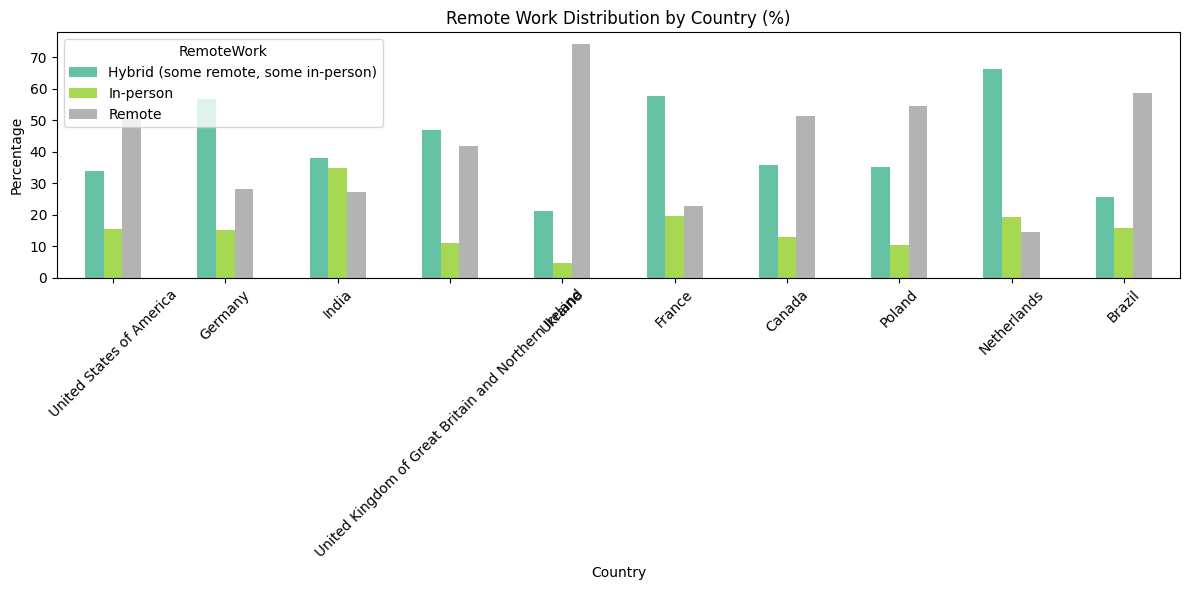

In [15]:
remote_pivot.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('Remote Work Distribution by Country (%)')
plt.ylabel('Percentage')
plt.xlabel('Country')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [22]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 180.0 MB/s eta 0:00:00


In [19]:
def convert_years_code_pro(value):
    if pd.isna(value):
        return None
    value = str(value).strip().lower()
    if 'less than' in value:
        return 0.5
    elif 'more than' in value:
        return 51.0
    else:
        try:
            return float(value)
        except ValueError:
            return None

# Áp dụng hàm
df['YearsCodePro_Clean'] = df['YearsCodePro'].apply(convert_years_code_pro)

In [25]:
## Write your code here
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro_Clean'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing data in either column
df_clean = df.dropna(subset=['JobSat', 'YearsCodePro_Clean'])

In [27]:
# Pearson correlation (linear)
pearson_corr = df_clean['JobSat'].corr(df_clean['YearsCodePro_Clean'], method='pearson')

# Spearman correlation (rank-based, non-linear)
spearman_corr = df_clean['JobSat'].corr(df_clean['YearsCodePro_Clean'], method='spearman')

print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}")

Pearson correlation: 0.103
Spearman correlation: 0.121


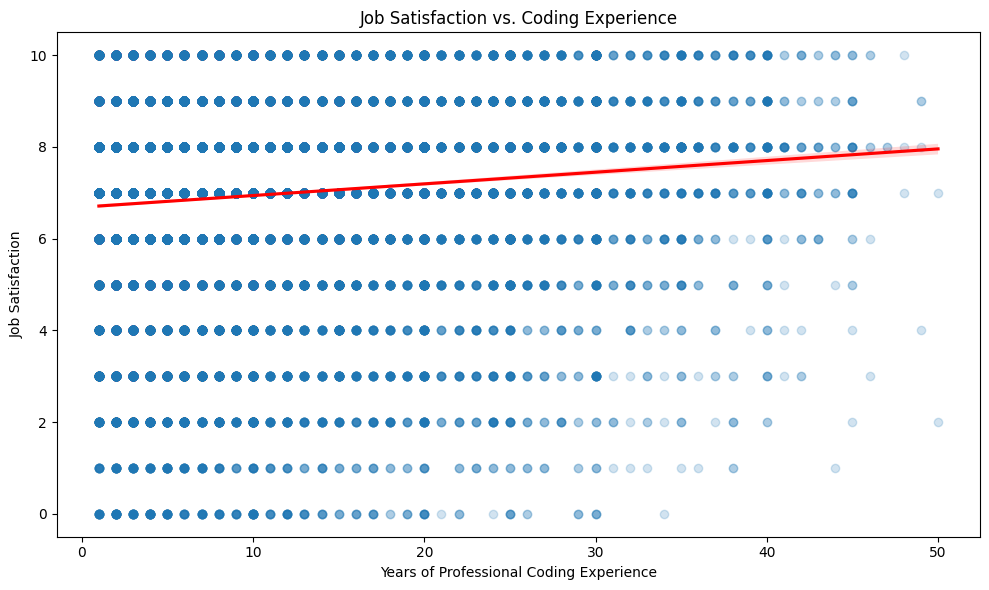

In [29]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='YearsCodePro_Clean', y='JobSat',
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
plt.title('Job Satisfaction vs. Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [31]:
## Write your code here
df_clean = df.dropna(subset=['Employment', 'EdLevel'])

# Tạo bảng chéo đếm số lượng
ctab = pd.crosstab(df_clean['Employment'], df_clean['EdLevel'])


EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment,,,,,,,,
"Employed, full-time",1059,16806,11011,160,2073,1460,3579,377
"Employed, full-time;Employed, part-time",9,90,61,1,8,9,15,3
"Employed, full-time;Independent contractor, freelancer, or self-employed",104,1381,963,25,159,181,492,41
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",11,79,45,1,10,6,14,2
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,0,0,0,1,0,0,0


/tmp/ipykernel_300/1802228474.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


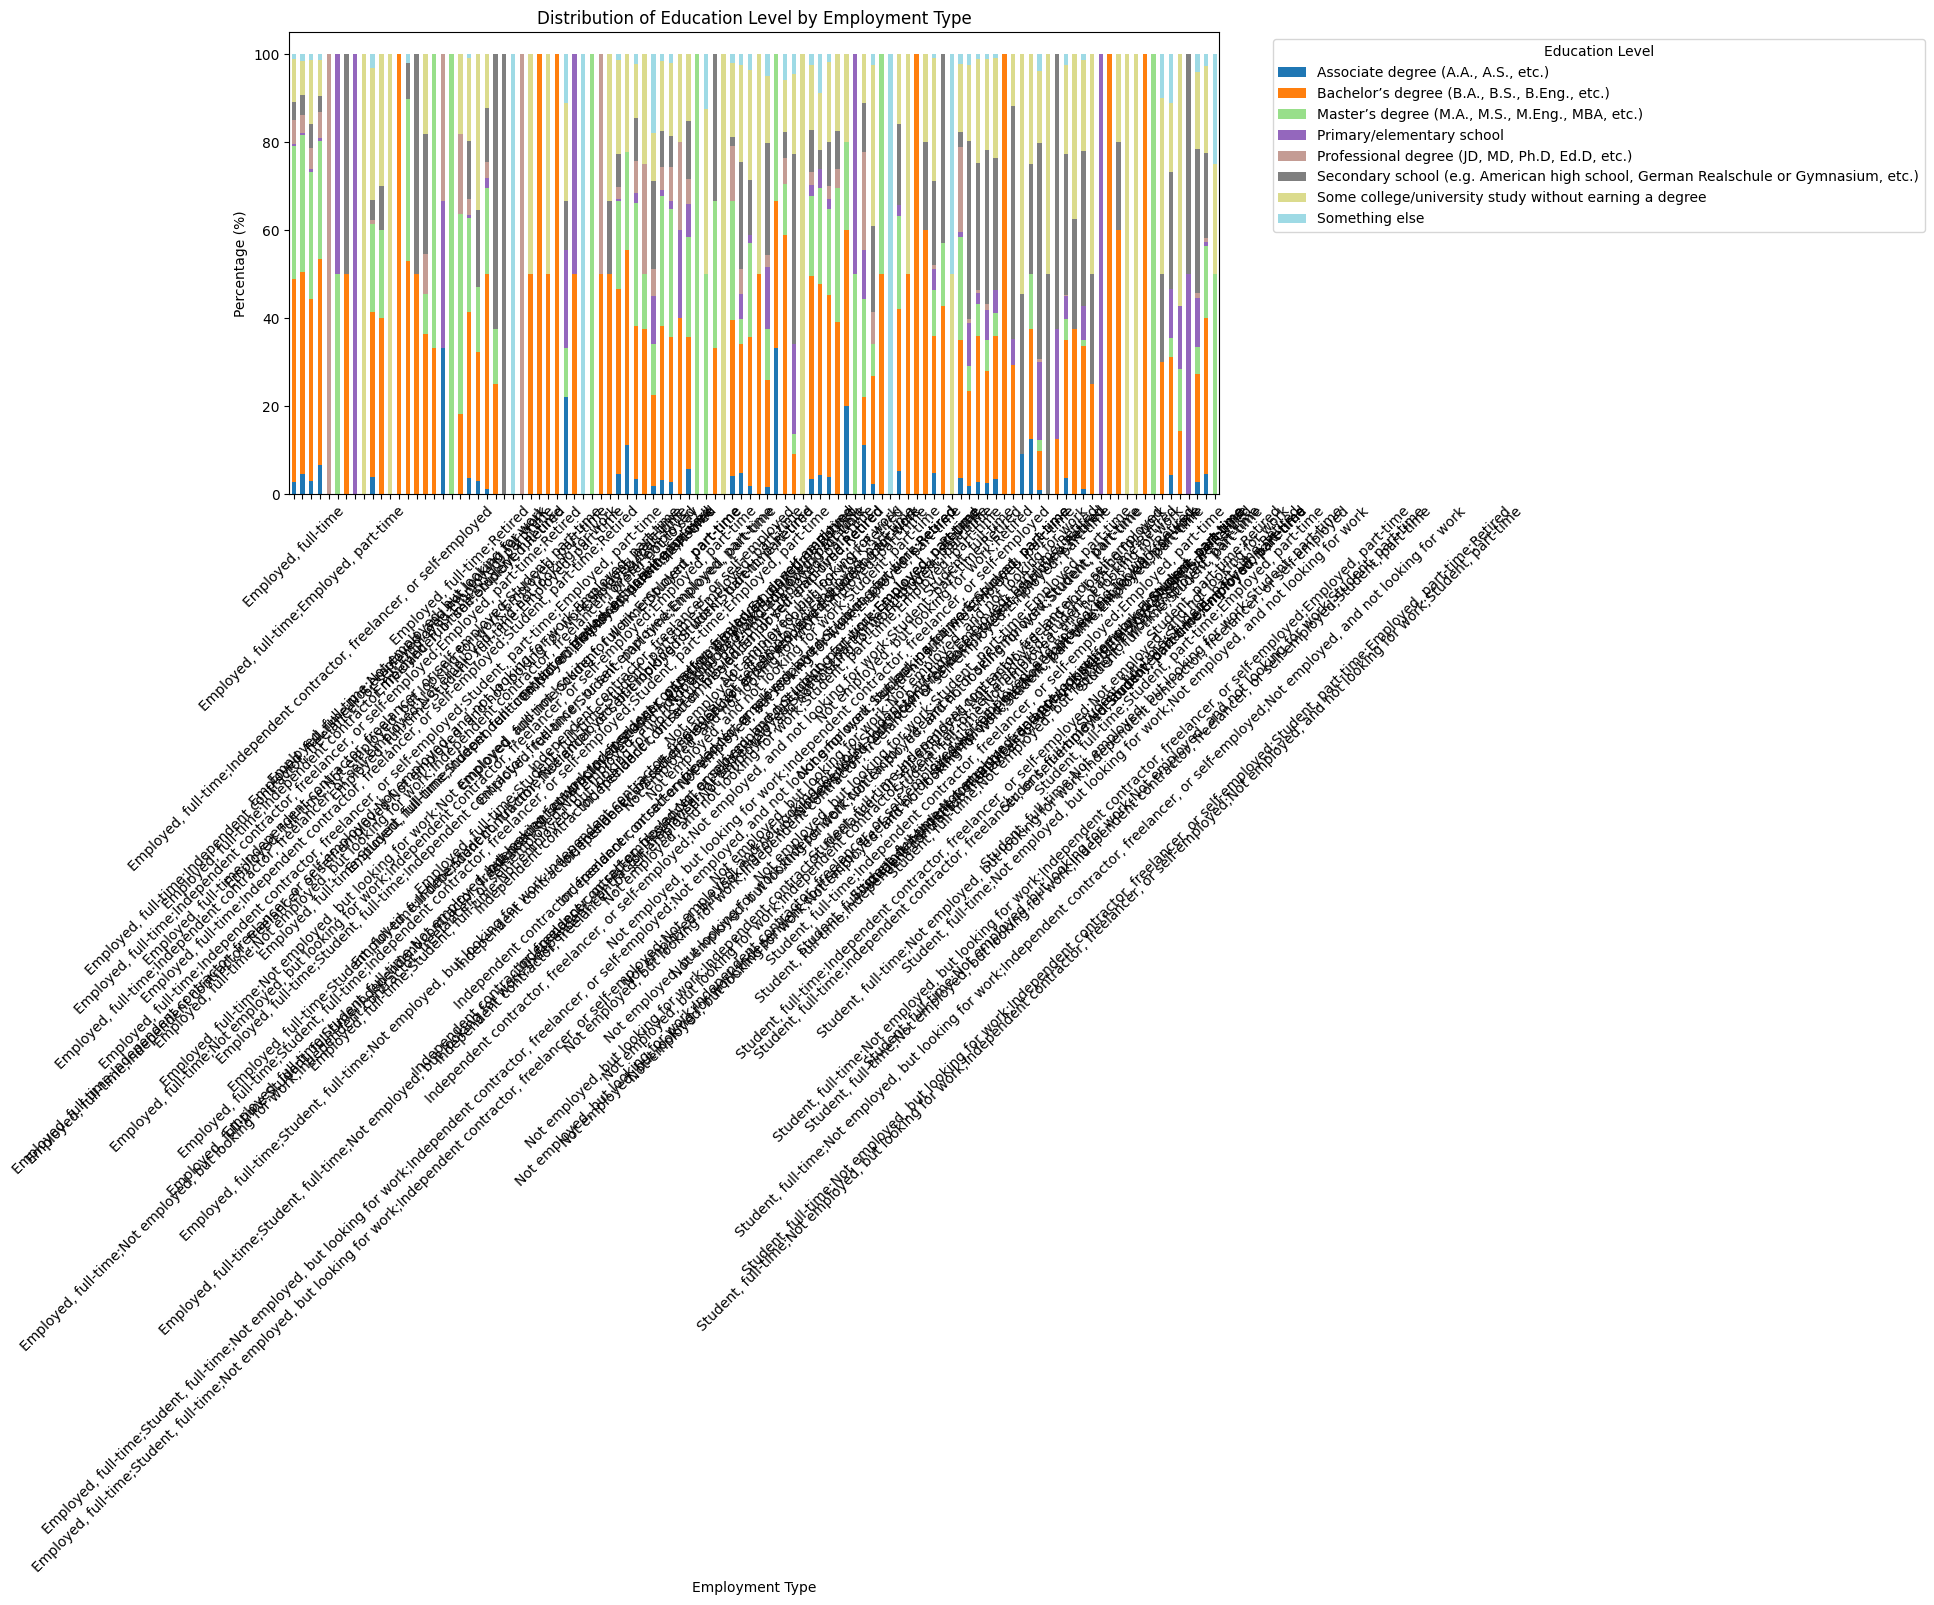

In [33]:
ctab_norm = ctab.div(ctab.sum(axis=1), axis=0) * 100
ctab_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Distribution of Education Level by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage (%)')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
#df.to_csv('cleaned_survey_data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
